# Project 01: Preparing Our Data

## Authors : Declan Sheehan & Jack Stoetzel

## Date: October 25, 2020

## Objectives:
This will be the first of a three-phase project for the semester. This first phase will begin the process of studying, cleaning, and starting to “engineer” the data. In the second and third phase, we will think about building models from the data, designing a predictive analysis study, and communicating the results through prose and visualization.

### College Basketball [Link to Dataset](https://www.kaggle.com/andrewsundberg/college-basketball-dataset)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./data/cbb.csv')

#### 1. What type of population is being sampled? What are the “things” getting measured.
The population being sampled is NCAA Division I Basketball Teams overall statistics for a given season.

#### 2. What features does each sample have, i.e. what is being measured?
There are 24 features that consist of
01. University Name
02. Conference
03. Games Played
04. Games Won
05. Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)
06. Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)
07. Power Rating (Chance of beating an average Division I team)
08. Effective Field Goal Percentage Shot
09. Effective Field Goal Percentage Allowed
10. Turnover Rate
11. Steal Rate
12. Offensive Rebound Percentage
13. Defensive Rebound Percentage
14. Free Throw Rate
15. Free Throw Rate Allowed
16. Two-Point Shooting Percentage
17. Two-Point Shooting Percentage Allowed
18. Three-Point Shooting Percentage
19. Three-Point Shooting Percentage Allowed
20. Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)
21. Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)
22. Postseason (Round where the given team's season ended (R68, R64, R32, S16, E8, F4, 2ND, Champion))
23. Seed in the NCAA March Madness Tournament
24. Year

#### 3. Are the features quantitative or qualitative? Ordinal or nominal? Continuous or discrete?
##### Quantitative Continuous
ADJOE, ADJDE, BARTHAG, EFG_O, EFG_D, TOR, TORD, ORB, DRB, FTR, FTRD, 2P_O, 2P_D, 3P_O, 3P_D, ADJ_T, WAB
##### Quantitative Discrete
G, W, YEAR
##### Qualitative Nominal
TEAM, CONF
##### Qualitative Ordinal
POSTSEASON, SEED

#### 4. Is the data “complete” or do some of the samples have null or absent values for certain features? Why are these samples still useful? Why are they incomplete?
This data is incomplete in the POSTSEASON and SEED columns. If teams were unable to qualify for the years postseason, the respective SEED and POSTSEASON columns are empty. Despite these null values, the overall statistics of each team are captured.

#### 5. Why are these features chosen to be part of the dataset?
The dataset contains a list of the most common statistics referred to throughout a basketball team's season. Many of these features factor into the decision of how "good" a team is. For example, if a team has a high 3-point percentage, that means they are likely to score more points, and therefore are more likely to win more games.

#### 6. What are some other features that are not included but that you think might make sense to include for this dataset?
Even though the name of a school’s conference can give a general idea where a team is located (SEC = Southeastern Conference, ACC = Atlantic Coast Conference, etc.), some conferences like the Big Ten are spread out in many different areas. Therefore, the data could include a column that identifies the state where the school is located which would be helpful in determining parts of the country that produce the most "successful" teams.

#### 7. Give at least one way that you can pivot the dataset to get a slightly different representation of some values. Explain what this is and how you would use it for a visualization.
One way the data can be pivoted is for each conference to plot the defensive efficiency across all 5 years of this data set. This would be a good way to see how the conferences stack up against each other, and how they have improved or worsened over the 5 years. Some conferences are notorious for having multiple teams with bad defenses, and this can be a good indicator whether those accusations are true. A good visualization of this would be a line graph, where every conference is labeled by a color, and the progression can be seen across all 5 years.

#### 8. Identify any possible relationships between features included in the data: which ones are likely to affect others?
A possible relationship can be made from a team’s 3-point percentage and their offensive efficiency. If one team scores more 3-pointers, they would be projected to have a higher offensive efficiency. 
 ##### I. Show at least one plot or visualization to illustrate this (possible) relationship.
 (See chart below)
 ##### ii. What numerical or statistical techniques might you consider using to determine whether the relationship is reliable?
 A technique that can be used is make similar graphs for many consecutive years to see if this relationship holds true over time. 
 ##### iii. Are there external inferences you think might be possible? 
 Yes. You may be able to infer that a team with a decent offensive efficiency that also has a low 3-point percentage might have a high 2-point percentage that would make up for the lesser amount of 3-point shots.

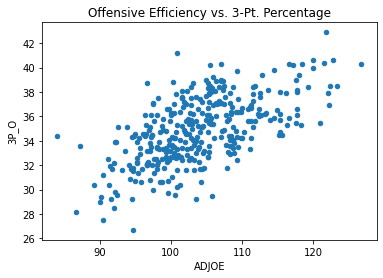

In [3]:
team_aoe_3po = data[(data['YEAR'] == 2017)][['TEAM', 'ADJOE', '3P_O']].groupby(['TEAM']).mean()   
team_aoe_3po.plot.scatter(x='ADJOE', y='3P_O', title="Offensive Efficiency vs. 3-Pt. Percentage")

#### 9. What “extra” features can you perhaps compute from the data? How might you use this information? 
One extra feature I could add is win percentage. Because we have the data on the number of games played by each team and the number of wins, we could compute a column that takes the number of wins and divides it by the number of games played. This would be useful to finding relationships between which features best determine the chance of a team winning their games.